<a href="https://colab.research.google.com/github/SushmithaAshok/Geospatial-Data-Analysis/blob/main/Copy_of_Geospatial_data_analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DISTRIBUTION OF ESSENTIAL **AMENITIES**

In [ ]:
import geopandas as gpd


Step 1: Import Libraries

This line imports the GeoPandas library, which is used for working with geospatial data in Python.

In [ ]:
school_file_path = "/content/schools.txt"
supermarket_file_path = "/content/supermarkets.txt"


Step 2: Specify File Paths

Here, you specify the file paths for the GeoJSON datasets containing information about schools and supermarkets.

In [ ]:
gdf_schools = gpd.read_file(school_file_path)
gdf_supermarkets = gpd.read_file(supermarket_file_path)


Step 3: Read GeoJSON Datasets into GeoDataFrames


Now, gdf_schools and gdf_supermarkets are GeoDataFrames containing the geospatial information about schools and supermarkets, respectively.

This code is essentially the setup phase, where you load the necessary libraries and datasets into the environment for further analysis or visualization. The GeoDataFrames allow you to work with the geospatial data in a tabular format, making it easier to perform spatial operations and analysis.

In [ ]:
import folium

Step 4:Import folium

This line imports the folium in python

In [ ]:
# Create a Folium map centered on Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)


Step 5: Create a Folium Map

This step initializes a Folium map centered on the coordinates of Paris with a specified zoom level.

In [ ]:
# Add school markers (red)
for index, row in gdf_schools.iterrows():
    popup = folium.Popup(f"School: {row['name']}", max_width=300)
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=6,
        color='red',
        fill=True,
        fill_color='red',
        popup=popup,
    ).add_to(m)

# Add supermarket markers (yellow)
for index, row in gdf_supermarkets.iterrows():
    popup = folium.Popup(f"Supermarket: {row['name']}", max_width=300)
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=6,
        color='yellow',
        fill=True,
        fill_color='yellow',
        popup=popup,
    ).add_to(m)


step 6:Add School and Supermarket Markers to the Folium Map
Step 1: Iterate through Rows in gdf_schools GeoDataFrame

for index, row in gdf_schools.iterrows():

This for loop iterates through each row in the gdf_schools GeoDataFrame, where index is the index of the row, and row is a Pandas Series containing the data for that row.

Step 2: Create a Popup for School Marker

popup = folium.Popup(f"School: {row['name']}", max_width=300)

This line creates a popup message for the school marker using the school's name from the 'name' column in the GeoDataFrame.

Step 3: Create and Add a Circle Marker for School

folium.CircleMarker(
    location=[row['geometry'].y, row['geometry'].x],
    radius=6,
    color='red',
    fill=True,
    fill_color='red',
    popup=popup,
).add_to(m)

Here, a red circle marker is created for each school. The location is set using the latitude and longitude information from the 'geometry' column of the GeoDataFrame. The circle has a radius of 6, a red border, and is filled with red color. The popup message is also associated with each circle marker. Finally, the circle marker is added to the Folium map (m).

Step 4: Repeat the Process for Supermarkets

for index, row in gdf_supermarkets.iterrows():
    popup = folium.Popup(f"Supermarket: {row['name']}", max_width=300)
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=6,
        color='yellow',
        fill=True,
        fill_color='yellow',
        popup=popup,
    ).add_to(m)

The same process is repeated for supermarkets, but with yellow circle markers.
This step iterates through each row of the GeoDataFrames for schools and supermarkets and adds corresponding markers to the Folium map. Schools are marked in red, and supermarkets are marked in yellow

In [ ]:
# Display the map in the Colab notebook
m

Step 7: Display the Folium Map
python
Copy code

This line of code displays the Folium map in the Colab notebook

In [ ]:
import matplotlib.pyplot as plt


Step 8: Import matplotlib

This line imports the  matplotlib  in python

Text(0.5, 1.0, 'Comparison of Schools and Supermarkets (Bar Graph)')

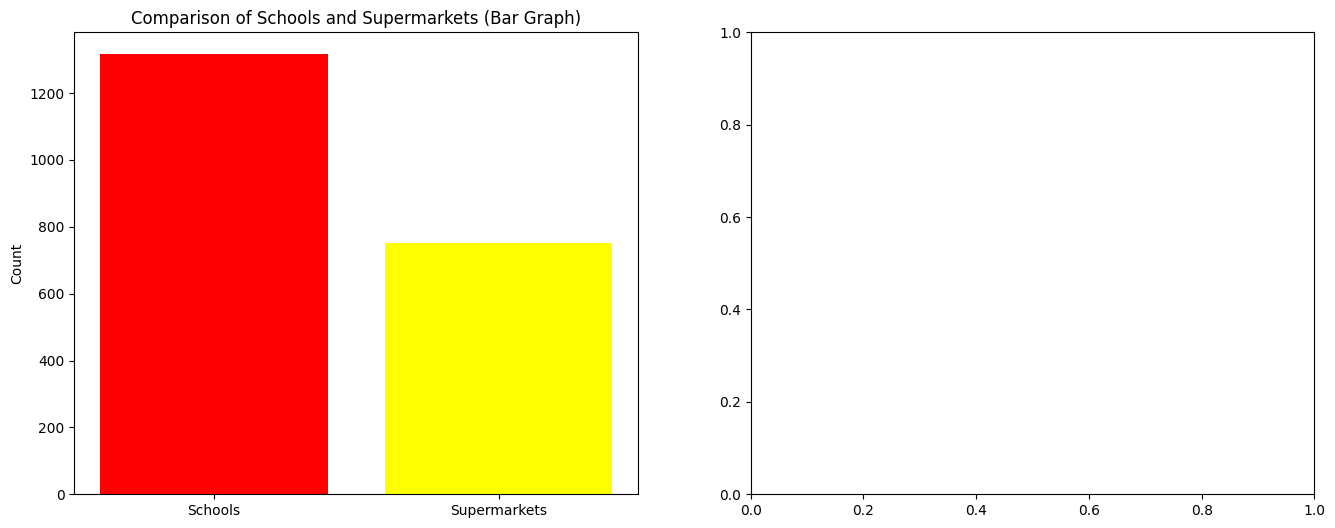

In [ ]:
# Analyze as a bar graph comparing schools and supermarkets
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

amenity_types = ['Schools', 'Supermarkets']
counts = [gdf_schools.shape[0], gdf_supermarkets.shape[0]]

ax[0].bar(amenity_types, counts, color=['red', 'yellow'])
ax[0].set_ylabel('Count')
ax[0].set_title('Comparison of Schools and Supermarkets (Bar Graph)')


step 9:Analyze as a Bar Graph

Step 1: Create Subplots

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

This line creates a figure (fig) and a set of subplots (ax) with one row and two columns. The figsize parameter specifies the width and height of the figure in inches.

Step 2: Define Amenity Types and Counts

amenity_types = ['Schools', 'Supermarkets']
counts = [gdf_schools.shape[0], gdf_supermarkets.shape[0]]

Here, you define the types of amenities ('Schools' and 'Supermarkets') and their corresponding counts, obtained from the shape of the GeoDataFrames.

Step 3: Create a Bar Graph

ax[0].bar(amenity_types, counts, color=['red', 'yellow'])

This line creates a bar graph on the first subplot (ax[0]). The x-axis represents amenity types ('Schools' and 'Supermarkets'), and the y-axis represents the counts. The bars are colored in red for schools and yellow for supermarkets.

Step 4: Set Axis Labels and Title

ax[0].set_ylabel('Count')
ax[0].set_title('Comparison of Schools and Supermarkets (Bar Graph)')

These lines set the y-axis label to 'Count' and the title of the bar graph.

Step 5: Display the Bar Graph

plt.show()

This step creates a bar graph comparing the counts of schools and supermarkets. The graph is displayed in the first subplot

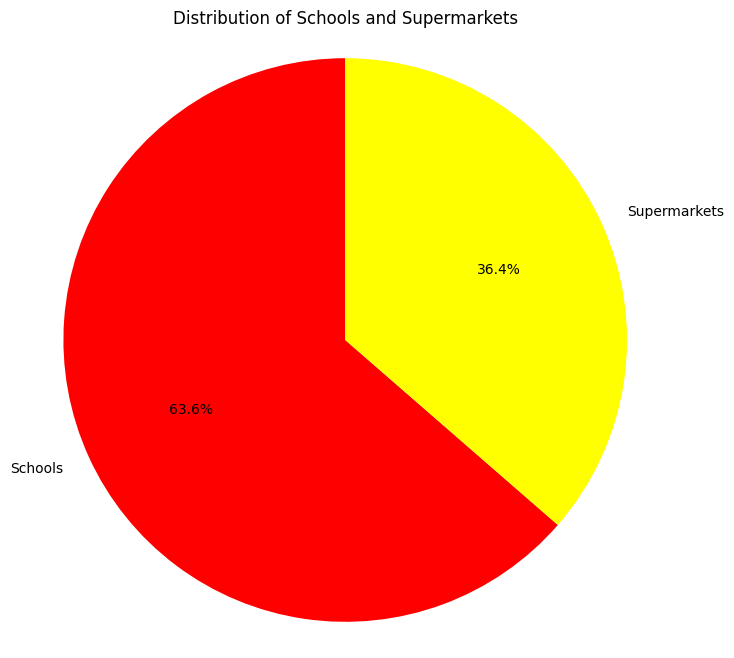

In [ ]:
# Analyze as a pie chart comparing schools and supermarkets
school_counts = gdf_schools.shape[0]
supermarket_counts = gdf_supermarkets.shape[0]

labels = ['Schools', 'Supermarkets']
sizes = [school_counts, supermarket_counts]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Schools and Supermarkets')
plt.show()


Step 10: Analyze as a Pie Chart

Step 1: Calculate Counts

school_counts = gdf_schools.shape[0]
supermarket_counts = gdf_supermarkets.shape[0]

These lines calculate the counts of schools and supermarkets by retrieving the number of rows in each GeoDataFrame.

Step 2: Define Labels and Sizes for the Pie Chart

labels = ['Schools', 'Supermarkets']
sizes = [school_counts, supermarket_counts]

Here, you define the labels for the pie chart as 'Schools' and 'Supermarkets', and the corresponding sizes based on the counts calculated in Step 1.

Step 3: Create a Pie Chart

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow'])

This line creates a pie chart with the specified sizes, labels, autopct (percentage format), startangle, and colors. The autopct parameter formats the percentages displayed on each wedge.

Step 4: Set Equal Aspect Ratio and Title

ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Distribution of Schools and Supermarkets')

Setting the equal aspect ratio ensures that the pie chart is circular. The plt.title sets the title of the pie chart.

Step 5: Display the Pie Chart

plt.show()

This line displays the pie chart.


This step creates a pie chart comparing the distribution of schools and supermarkets. The chart is displayed in the second subplot.
